In [91]:
import csv
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use('ggplot')

In [92]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [93]:
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [150]:
train = pd.read_csv('E:/Donlow/titanic/train.csv')
test = pd.read_csv('E:/Donlow/titanic/test.csv')
submit = pd.read_csv('E:/Donlow/titanic/gender_submission.csv')

In [95]:
print(train.shape)
print('----')
print(test.shape)
print('----')
print(submit.shape)

(891, 12)
----
(418, 11)
----
(418, 2)


In [96]:
def col_type(data):
    column_type = data.dtypes.to_frame().reset_index() #判別每個欄位型態
    column_type.columns = ['ColumnName','Type']
    column_type.sort_values(by='Type',inplace = True)
    return column_type

In [97]:
train_obj = col_type(train)

In [98]:
print(train_obj)

     ColumnName     Type
0   PassengerId    int64
1      Survived    int64
2        Pclass    int64
6         SibSp    int64
7         Parch    int64
5           Age  float64
9          Fare  float64
3          Name   object
4           Sex   object
8        Ticket   object
10        Cabin   object
11     Embarked   object


In [99]:
def miss_counts(data):
    missing = data.isnull().sum()
    missing = missing[missing>0]
    missing.sort_values(inplace = True)
    
    miss_count = pd.DataFrame({'ColumName':missing.index,'misscount':missing.values})
    miss_count['Percentage(%)'] = miss_count['misscount'].apply(lambda x:round(x/data.shape[0]*100,2))
    return miss_count

In [100]:
print(miss_counts(train))
print('----')
print(miss_counts(test))

  ColumName  misscount  Percentage(%)
0  Embarked          2           0.22
1       Age        177          19.87
2     Cabin        687          77.10
----
  ColumName  misscount  Percentage(%)
0      Fare          1           0.24
1       Age         86          20.57
2     Cabin        327          78.23


In [101]:
print(train.describe())
print('---------')
print(test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
---------
       PassengerId      Pclass         Age       SibSp       Parch     

In [151]:
data = train.append(test)
print(data.shape)

(1309, 12)


In [103]:
surived_counts = data['Survived'].value_counts().reset_index()  
surived_counts.colums = ['Surived','counts']
print (surived_counts) #0是罹難者

   index  Survived
0    0.0       549
1    1.0       342


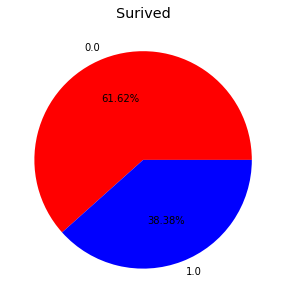

In [104]:
plt.figure(figsize=(10,5))
data['Survived'].value_counts().plot(kind='pie',colors=['red','blue'],autopct='%1.2f%%')
plt.title('Surived')
plt.ylabel('')
plt.show()

In [105]:
#surived與其他欄位的相關係數
corr = train.corr()
cor = corr.loc['Survived',:].sort_values()[:-1]  #由小排到大
cor = pd.DataFrame({'Survived':cor})
print(cor)

             Survived
Pclass      -0.338481
Age         -0.077221
SibSp       -0.035322
PassengerId -0.005007
Parch        0.081629
Fare         0.257307


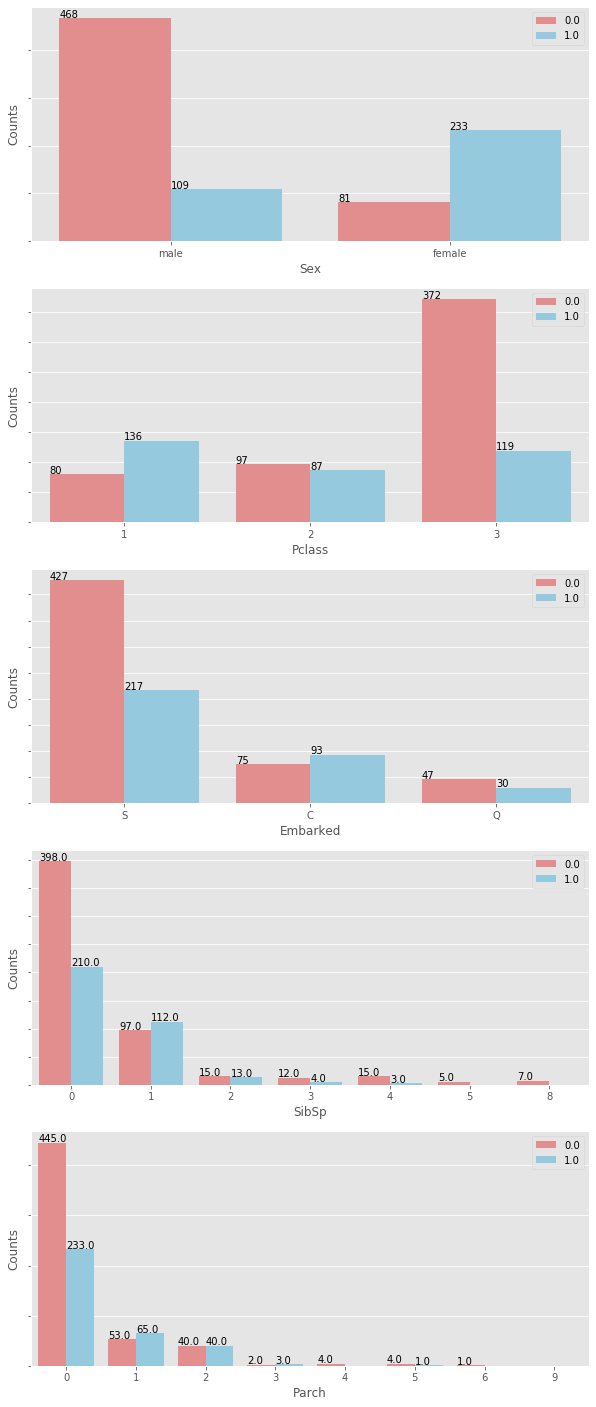

In [106]:
select = ['Sex','Pclass','Embarked','SibSp','Parch']
plt.figure(figsize=(10,len(select)*5))
gs = gridspec.GridSpec(len(select),1)
for i, col in enumerate( data[select]):
    ax = plt.subplot(gs[i])
    sns.countplot(data[col],hue = data.Survived,palette=['lightcoral','skyblue'])
    ax.set_yticklabels([])
    ax.set_ylabel('Counts')
    ax.legend(loc=1)
    for p in ax.patches:
        ax.annotate('{:,}'.format(p.get_height()),(p.get_x(),p.get_height()+1.5))
plt.show()

In [107]:
data['family'] = data['SibSp'] + data['Parch'] + 1 

Survival = data[['family','Survived']].groupby(by=['family']).agg(np.mean)*100
Survival.colums=['survived Rate(%)']
Survival.reset_index()

,family,Survived
0,1,30.353818
1,2,55.279503
2,3,57.843137
3,4,72.413793
4,5,20.000000
5,6,13.636364
6,7,33.333333
7,8,0.000000
8,11,0.000000


In [108]:
data['family_class'] = np.nan

data.loc[data.family==0 , 'family_class'] = 2
data.loc[data.family>=1 & (data.family <=3) , 'family_class'] = 3
data.loc[data.family>=4 & (data.family <=6) , 'family_class'] = 2
data.loc[data.family>=7 , 'family_class'] = 1

In [109]:
sur = data[['Sex','Pclass','Survived']].groupby(by=['Sex','Pclass']).agg(np.mean)*100
sur.columns = ['Survived Rate(%)']
sur.reset_index()

,Sex,Pclass,Survived Rate(%)
0,female,1,96.808511
1,female,2,92.105263
2,female,3,50.000000
3,male,1,36.885246
4,male,2,15.740741
5,male,3,13.544669


In [110]:
data['sex_class'] = np.nan
data.loc[(data.Sex =='female') & (data.Pclass==1),'sex_class']=2
data.loc[(data.Sex =='female') & (data.Pclass==2),'sex_class']=3
data.loc[(data.Sex =='female') & (data.Pclass==3),'sex_class']=3
data.loc[(data.Sex =='male') & (data.Pclass==1),'sex_class']=1
data.loc[(data.Sex =='male') & (data.Pclass==2),'sex_class']=1
data.loc[(data.Sex =='male') & (data.Pclass==3),'sex_class']=2

In [152]:
data['title'] = data.Name.str.split(',',expand=True)[1]
data['title'] = data.title.str.split(',',expand=True)[0]
data['title'].unique()

array([' Mr. Owen Harris', ' Mrs. John Bradley (Florence Briggs Thayer)',
       ' Miss. Laina', ..., ' Dona. Fermina', ' Mr. Simon Sivertsen',
       ' Master. Michael J'], dtype=object)

In [153]:
import re

regex = re.compile('([A-Za-z]+)\.')
data['title'] = data.Name.map(lambda x:regex.search(x)[0])

#data['title'] = data.title.map(lambda x:x[1:][:-1])
data['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.', 'Dona.'], dtype=object)

In [154]:
data['title'] = data.title.replace(['Don.','Rev.','Dr.','Major.','Sir.','Col.','Capt.','Countess.','Jonkheer.','Dona.'],'Rare.')
data['title']=data.title.replace(['Ms.','Mlle.'],'Miss.')
data['title']=data.title.replace('Mme.','Mrs.')
data['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Rare.', 'Lady.'], dtype=object)

In [155]:
data.drop('Name',axis=1,inplace=True)

In [156]:
data['Ticket_info'] = data.Ticket.apply( lambda x:x.replace('.','').replace('/','').strip().split(' ')[0] if not x.isdigit() else 'X')
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

In [157]:
data.drop( 'Ticket', axis=1, inplace=True )

In [122]:
data['Fare'].fillna(data.Fare.median(),inplace=True)

In [123]:
print(data['Embarked'].value_counts())
data['Embarked'].fillna('S', inplace=True)

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [173]:
data['isage'] = data['Age'].isnull().map(lambda x:0 if x ==True else 1)

In [174]:
print (pd.crosstab(data.isage , data.Sex , margins = True))
print('--------')
print (pd.crosstab(data.isage , data.Pclass , margins = True))

Sex    female  male   All
isage                    
0          78   177   255
1         388   666  1054
All       466   843  1309
--------
Pclass    1    2    3   All
isage                      
0        39   16  200   255
1       284  261  509  1054
All     323  277  709  1309


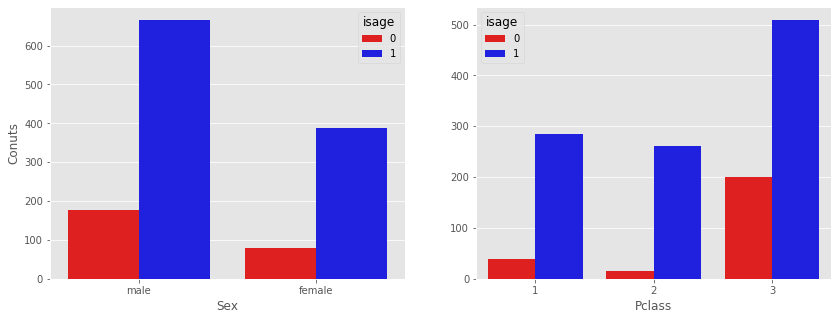

In [175]:
fig, axs = plt.subplots(1,2,figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(data.Sex , hue=data.isage , palette=['red','blue'])
plt.ylabel('Conuts')

plt.subplot(1,2,2)
sns.countplot(data.Pclass , hue=data.isage , palette=['red','blue'])
plt.ylabel('')

plt.show()

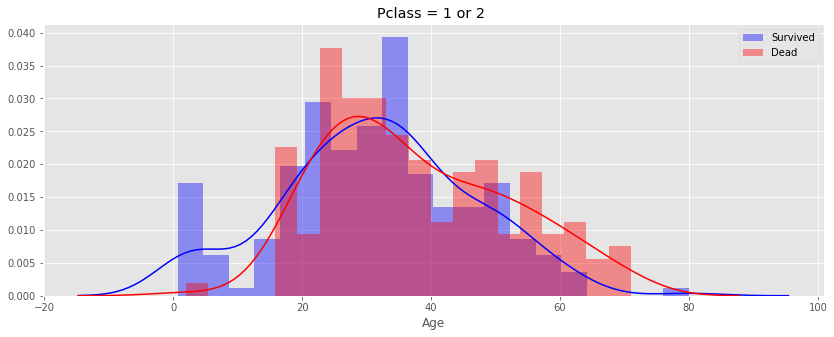

In [176]:
index_S = (data.isage==1)&(data.Pclass!=3)&(data.Survived==1)
index_D = (data.isage==1)&(data.Pclass!=3)&(data.Survived==0)

plt.figure(figsize=(14,5))
sns.distplot (data.loc[index_S,'Age'], bins=20 ,color='blue' , label='Survived')
sns.distplot (data.loc[index_D,'Age'], bins=20 ,color='red' , label='Dead')
plt.title('Pclass = 1 or 2 ')
plt.legend()
plt.show()

In [177]:
age_mean = data[['title','Age']].groupby(by=['title']).mean()
age_medin = data[['title','Age']].groupby(by=['title']).median()

age_mean.columns = ['Age Mean']
age_medin.columns = ['Age Median']
age_mean.reset_index(inplace=True)
age_medin.reset_index(inplace=True)

print(age_mean)
print(age_medin)

DataError: No numeric types to aggregate

In [182]:
data.loc[(data.Age.isnull())&(data.title=='Master.'),'Age'] = '60'
data.loc[(data.Age.isnull())&(data.title=='Miss'),'Age'] = '40'
data.loc[(data.Age.isnull())&(data.title=='Mr'),'Age'] = '35'
data.loc[(data.Age.isnull())&(data.title=='Mrs'),'Age'] = '35'
data.loc[(data.Age.isnull())&(data.title=='Rare'),'Age'] = '28'

In [185]:
data.Age.fillna('30',inplace=True)

In [191]:
data.drop('isage',axis=1,inplace=True)

In [202]:
data['isage'] = (data.AAA<17)*1
print(data)

data.Age.type()

      Age Cabin Embarked      Fare  Parch  PassengerId  Pclass     Sex  SibSp  \
0      22   NaN        S    7.2500      0            1       3    male      1   
1      38   C85        C   71.2833      0            2       1  female      1   
2      26   NaN        S    7.9250      0            3       3  female      0   
3      35  C123        S   53.1000      0            4       1  female      1   
4      35   NaN        S    8.0500      0            5       3    male      0   
..    ...   ...      ...       ...    ...          ...     ...     ...    ...   
413    30   NaN        S    8.0500      0         1305       3    male      0   
414    39  C105        C  108.9000      0         1306       1  female      0   
415  38.5   NaN        S    7.2500      0         1307       3    male      0   
416    30   NaN        S    8.0500      0         1308       3    male      0   
417    10   NaN        C   22.3583      1         1309       3    male      1   

     Survived    title Tick

AttributeError: 'Series' object has no attribute 'type'

In [203]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [204]:
data['Cabin'] =data['Cabin'].apply(lambda x:str(x)[0] if not pd.isnull(x) else 'NoCabin')
data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [207]:
miss_counts(data.drop('Survived', axis=1))

,ColumName,misscount,Percentage(%)
0,Fare,1,0.08
1,Embarked,2,0.15


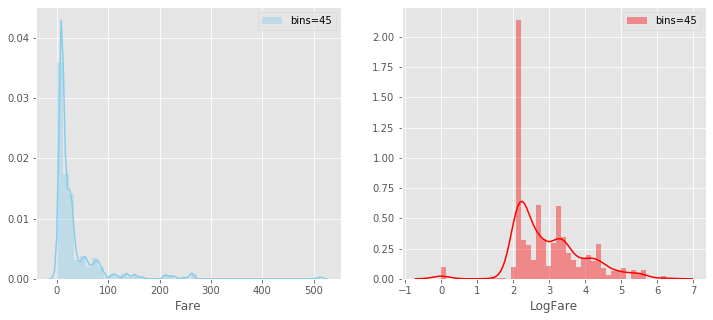

In [216]:
data['LogFare'] = np.log1p(data.Fare )

fig, axs = plt.subplots( 1,2,figsize=(12,5) )


plt.subplot(1,2,1)
sns.distplot(data.Fare , kde=True , bins=45 ,color = 'skyblue' , label='bins=45')
plt.xlabel='Fare'
plt.ylabel = 'Counts'
plt.legend()

plt.subplot(1,2,2)
sns.distplot(data.LogFare, kde=True , bins=45 , color='red' , label='bins=45')
plt.xlabel = 'Fare'
plt.ylabel = 'Counts'
plt.legend()

plt.show()

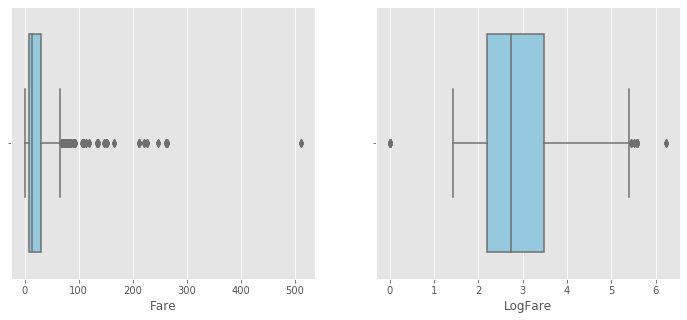

In [224]:
fig, axs = plt.subplots( 1,2,figsize=(12,5) )

plt.subplot(1,2,1)
sns.boxplot(data.Fare , orient='h' , color = 'skyblue')


plt.subplot(1,2,2)
sns.boxplot(data.LogFare , orient='h' , color = 'skyblue')


plt.show()

In [235]:
hot_emba = pd.get_dummies(data.Embarked , prefix = 'Embarked')

In [237]:
data = pd.concat([data , hot_emba], axis=1)

data.drop('Embarked' , axis=1 , inplace=True)

In [238]:
sex = {'male':0 , 'female':1}
data['Sex'] =data.Sex.map(sex)

In [241]:
for col in ['title','Ticket_info','Cabin']:
    data[col] = data[col].astype('category').cat.codes

    
data.drop('Age',axis=1,inplace=True)    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
Cabin          1309 non-null int8
Fare           1308 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
title          1309 non-null int8
Ticket_info    1309 non-null int8
AAA            1309 non-null float64
isage          1309 non-null int32
LogFare        1308 non-null float64
Embarked_C     1309 non-null uint8
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
dtypes: float64(4), int32(1), int64(5), int8(3), uint8(3)
memory usage: 155.0 KB


In [247]:
Train = data[pd.notnull(data.Survived)]
Test = data[pd.isnull(data.Survived)]

In [249]:
Train.drop(['PassengerId'],axis=1 ,inplace=True)
Test.drop(['PassengerId','Survived'],axis=1 ,inplace=True)


Y_train = Train.Survived
X_train = Train.drop(['Survived'], axis=1)


In [254]:
DCT = RandomForestClassifier()

DCT.fit(X_train , Y_train)

cok_names = X_train.columns

importances = DCT.feature_importances_

Feature = pd.DataFrame({'Feature':cok_names , 'Importances':importances})
Feature.sort_values(by='Importances', ascending=False , inplace=True)
print (Feature)

        Feature  Importances
8           AAA     0.184732
4           Sex     0.175955
10      LogFare     0.137277
1          Fare     0.132884
6         title     0.098721
0         Cabin     0.057252
3        Pclass     0.054232
5         SibSp     0.043556
7   Ticket_info     0.039110
2         Parch     0.028133
13   Embarked_S     0.015048
9         isage     0.013426
11   Embarked_C     0.011721
12   Embarked_Q     0.007953


In [255]:
RFC = RandomForestClassifier (n_estimators= 1000,
                              min_samples_split = 20,
                              min_samples_leaf = 1,
                              oob_score = True,
                              random_state = 1,
                              n_jobs = -1
                             )

In [256]:
RFC.fit(X_train , Y_train)
print('oob_score={:.6f}'.format(RFC.oob_score_))

oob_score=0.827160


In [257]:
RFC2 = RandomForestClassifier (n_estimators= 1000,
                              min_samples_split = 20,
                              min_samples_leaf = 1,
                              oob_score = True,
                              random_state = 1,
                              n_jobs = -1
                             )

In [258]:
Select = ['AAA','Sex','LogFare','title','Cabin','Pclass']

RFC2.fit(X_train[Select],Y_train)

print(format(RFC2.oob_score_))

0.8395061728395061
